<a href="https://colab.research.google.com/github/SpartaRoman/Dom-c-_-kol/blob/main/RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importy a načtení dat
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


wine=pd.read_csv("./winequality-red.csv")

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='citric acid', ylabel='quality'>

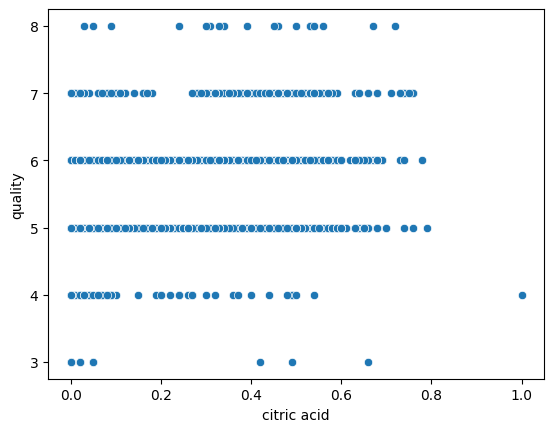

In [ ]:

sns.scatterplot(x="citric acid", y="quality", data=wine)

In [ ]:
  lin=LinearRegression()

In [ ]:
X=wine[["volatile acidity"]]
y=wine["quality"]
model=lin.fit(X,y)
model.score(X,y)

0.1525353797247485

In [ ]:
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
list_R=[]
for cols in list(wine.columns):
  X=wine[[cols]]
  y=wine["quality"]
  model=lin.fit(X,y)
  list_R.append((cols, model.score(X,y)))

In [ ]:
list_R

[('fixed acidity', 0.015388811647710554),
 ('volatile acidity', 0.1525353797247485),
 ('citric acid', 0.051244515238671906),
 ('residual sugar', 0.00018855786403915165),
 ('chlorides', 0.0166169011930003),
 ('free sulfur dioxide', 0.00256603613553541),
 ('total sulfur dioxide', 0.03426211696068793),
 ('density', 0.030596736248323153),
 ('pH', 0.0033329135305089075),
 ('sulphates', 0.06320049136455663),
 ('alcohol', 0.22673436811275482),
 ('quality', 1.0)]

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

list_R_p=[]
for cols in list(wine.columns):
  X=wine[[cols]]
  y=wine["quality"]
  poly_features=poly.fit_transform(X)
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, y)
  y_pred=poly_reg_model.predict(poly_features)
  list_R_p.append((cols, r2_score(y, y_pred)))

In [ ]:
list_R_p

[('fixed acidity', 0.02843604129123478),
 ('volatile acidity', 0.1571815632910445),
 ('citric acid', 0.060687663967938454),
 ('residual sugar', 0.0009199648692647111),
 ('chlorides', 0.03729894577855819),
 ('free sulfur dioxide', 0.002713106597597603),
 ('total sulfur dioxide', 0.048842106587624445),
 ('density', 0.0554105258952331),
 ('pH', 0.005281128145663616),
 ('sulphates', 0.15265231678410351),
 ('alcohol', 0.2341354373233212),
 ('quality', 1.0)]

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


vybrali jsme sloupce které mají nějaký vliv na kvalitu - podle lineární závisloti - funkce pd.corr():
*   volatile acidity
*   alcohol
*   suplphates
*   citric acid



In [ ]:
X=wine[["volatile acidity", "alcohol", "sulphates", "citric acid"]]
y=wine["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [ ]:
lin=LinearRegression()
lin.fit(X_train,y_train)
lin.score(X_test, y_test)

0.3875856874490632

In [ ]:
y_pred=lin.predict(X_test)

In [ ]:
print(lin.coef_)
print(lin.intercept_)



[-1.19179476  0.31057847  0.63428063 -0.06150289]
2.6187224554379336


In [ ]:
r2_score(y_test, y_pred)

0.3875856874490632

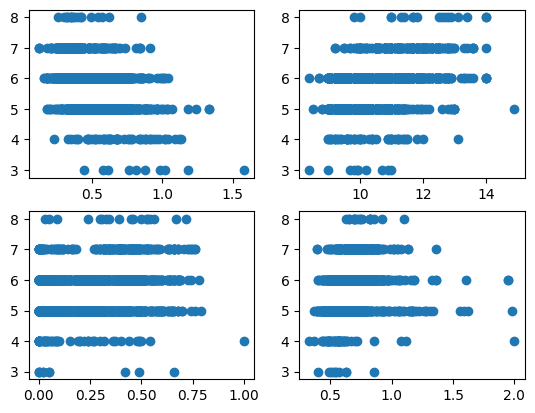

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0][0].scatter(x=X["volatile acidity"], y=y)
ax[0][1].scatter(x=X["alcohol"], y=y)
ax[1][0].scatter(x=X["citric acid"], y=y)
ax[1][1].scatter(x=X["sulphates"], y=y)


In [ ]:
ridge=Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1]).fit(X_train, y_train)



lin: 0.3875856874490632
ridge: 0.3868374863037475
ridgeCV: 0.3860852546308591


In [ ]:
print(lin.coef_, lin.intercept_)
print(ridge.coef_, ridge.intercept_)
print(ridge_cv.coef_, ridge_cv.intercept_)

[-1.19179476  0.31057847  0.63428063 -0.06150289] 2.6187224554379336
[-1.17137827  0.31106899  0.62711908 -0.04904688] 2.604112900061723
[-1.15184177  0.31153872  0.62016485 -0.03731794] 2.5902481593610287


In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features=poly.fit_transform(X_train)
poly_model=LinearRegression()
poly_model.fit(poly_features, y_train)

poly_test = poly.fit_transform(X_test)
y_pred=poly_model.predict(poly_test)



0.3862672702865052
0.4142644628153618


In [ ]:
print(f"lin: {lin.score(X_test, y_test)}")
print(f"ridge(a=0.5): {ridge.score(X_test,y_test)}")
print(f"ridgeCV: {ridge_cv.score(X_test, y_test)}")
print(f"poly(3): {r2_score(y_test, y_pred)}")

lin: 0.3875856874490632
ridge(a=0.5): 0.3868374863037475
ridgeCV: 0.3860852546308591
poly(3): 0.4142644628153618
